In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(r"D:\mlproject\notebook\student.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
x=df.drop(columns="math_score",axis=1)
y=df["math_score"]

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("category in gender feature:",end=" ")
print(df["gender"].unique())
print("categories in race ethnicity feature:",end=" ")
print(df["race_ethnicity"].unique())
print("categories in parental level of eduation feature:",end=" ")
print(df["parental_level_of_education"].unique())
print("categorical features in lunch: ",end=" ")
print(df["lunch"].unique())
print("categories in test preparation course :",end=" ")
print(df["test_preparation_course"].unique())

category in gender feature: ['female' 'male']
categories in race ethnicity feature: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of eduation feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical features in lunch:  ['standard' 'free/reduced']
categories in test preparation course : ['none' 'completed']


In [7]:
numerical_features=x.select_dtypes(exclude="object").columns
categorical_feature=x.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_trasformer=OneHotEncoder()
numerical_transformer=StandardScaler()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoding",categorical_trasformer,categorical_feature),
        ("StanderScaler",numerical_transformer,numerical_features)
    ]
)

In [8]:
x=preprocessor.fit_transform(x)

In [9]:
x.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [11]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, rmse, r2_square

In [12]:
models={
    "linear regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Decision tree":DecisionTreeRegressor(),
    "random forest regressor":RandomForestRegressor(),
    "xg boost":XGBRegressor(),
    "addaboost ":AdaBoostRegressor(),
    "cat boost":CatBoostRegressor(verbose=False) 

}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_predict=model.predict(x_train)
    y_test_predict=model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_predict)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_predict)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

linear regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-------------------------

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,linear regression,0.880345
5,random forest regressor,0.852301
8,cat boost,0.851632
7,addaboost,0.850890
6,xg boost,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,Decision tree,0.719876


In [17]:
linear_model=LinearRegression(fit_intercept=True)
linear_model=linear_model.fit(x_train,y_train)
y_predict=linear_model.predict(x_test)
score=r2_score(y_test,y_predict)*100
print(f"accuracy of the model is {score}%")

accuracy of the model is 88.03449074540941%


Text(0, 0.5, 'prediction')

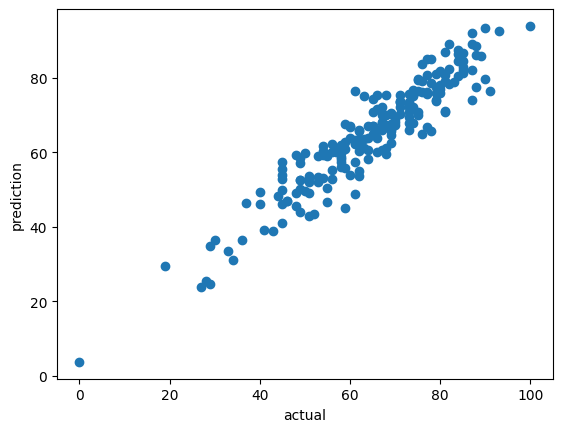

In [19]:
plt.scatter(y_test,y_predict)
plt.xlabel("actual")
plt.ylabel("prediction")

<Axes: xlabel='math_score'>

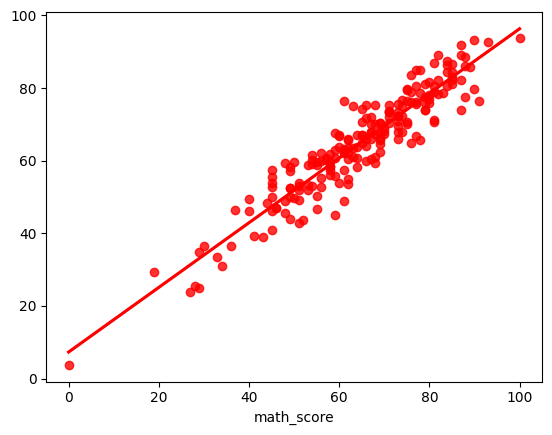

In [24]:
sb.regplot(x=y_test,y=y_predict,ci=None,color ='red')

In [25]:
predict_df=pd.DataFrame({"actual":y_test,"prediction":y_predict,"difference between t_test and y_predict":y_test-y_predict})
predict_df

,actual,prediction,difference between t_test and y_predict
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
